# **Exploring and Visualizing Wave Files**

In [1]:
import os 
import matplotlib.pyplot as plt 
import numpy as np
from tqdm import tqdm
import pandas as pd
import librosa
from scipy.io import wavfile
from python_speech_features import mfcc, logfbank

In [2]:
curr_dir = os.getcwd()
dirs = ['laugh_wavs', 'drum_wavs', 'pik_wavs']
for direc in dirs:
    new = os.path.join(curr_dir, direc)
    print(new)

/Users/calzada/birdsongs/wood/01_data/laugh_wavs
/Users/calzada/birdsongs/wood/01_data/drum_wavs
/Users/calzada/birdsongs/wood/01_data/pik_wavs


In [3]:
data = {}
for direc in dirs:
    new = os.path.join(curr_dir, direc)
    name = (direc.split('_'))[0]
    files_count = len(os.listdir(new))
    data[name] = files_count
    #if name in data:
     #   data[name] += files_count
    #else:
     #   data[name] = files_count

df = pd.DataFrame(list(data.items()), columns=['call type', 'count'])
df

,call type,count
0,laugh,97
1,drum,28
2,pik,36


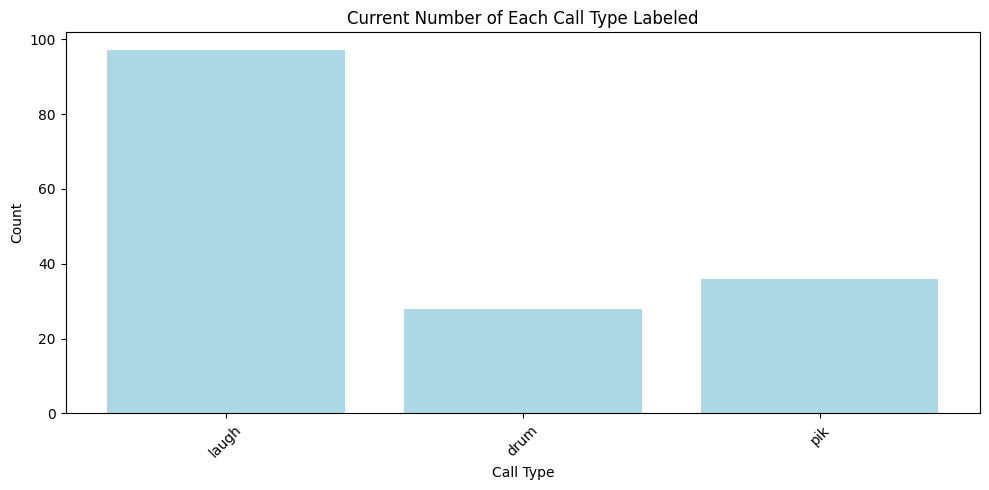

In [17]:
plt.figure(figsize=(10,5))
plt.bar(df['call type'], df['count'], color = 'lightblue')
plt.xlabel('Call Type')
plt.ylabel('Count')
plt.title('Current Number of Each Call Type Labeled')
plt.xticks(rotation=45)
plt.tight_layout() 
plt.show()

## **Functions** 

In [6]:
def calc_fft(y, rate):
    n=len(y)
    freq = np.fft.rfftfreq(n, d=1/rate) 
    Y = abs(np.fft.rfft(y)/n) # normalize to scale to the length of the signal
    return Y, freq 

In [7]:
def plot_signals(signals):
    fig, axes = plt.subplots(nrows=1, ncols=3, sharex=False, sharey=True, figsize=(20, 5))
    fig.suptitle('Time Series', size=16)
    for i, ax in enumerate(axes):
        ax.set_title(list(signals.keys())[i])
        ax.plot(list(signals.values())[i])
        ax.get_xaxis().set_visible(True) 
        ax.get_yaxis().set_visible(True)  
    #plt.tight_layout()
    plt.show()

In [8]:
def plot_fft(fft):
    fig, axes = plt.subplots(nrows=1, ncols=3, sharex=False, sharey=True, figsize=(20, 5))
    fig.suptitle('Fourier Transforms', size=16)
    i = 0 
    #for x in range(3):  
    for y in range(3):
        data = list(fft.values())[i]
        Y, freq = data[0], data[1]
        axes[y].set_title(list(fft.keys())[i])
        axes[y].plot(freq, Y)
        axes[y].get_xaxis().set_visible(True)  
        axes[y].get_yaxis().set_visible(True)  
        axes[y].set_xlabel('Freqeuncy (Hz)')
        axes[y].set_ylabel('Magnitude')
        i += 1 
    #plt.tight_layout()
    plt.show()

In [9]:
def plot_fbank(fbank):
    fig, axes = plt.subplots(nrows=1, ncols=3, sharex=False, sharey=True, figsize=(20,5))
    fig.suptitle('Filter Bank Coefficients', size=16)
    i = 0 
    #for x in range(3):    
    for y in range(3):
        axes[y].set_title(list(fbank.keys())[i])
        axes[y].imshow(list(fbank.values())[i], cmap='hot', interpolation='nearest')
        axes[y].get_xaxis().set_visible(False)
        axes[y].get_yaxis().set_visible(False)
        i+=1
    #plt.tight_layout()
    plt.show()

In [10]:
def plot_mfccs(mfccs):
    fig, axes = plt.subplots(nrows=1, ncols=3, sharex=False, sharey=True, figsize=(20,5))
    fig.suptitle('Mel Frequency Cepstrum Coefficients', size=16)
    i = 0 
    #for x in range(3):
    for y in range(3):
        axes[y].set_title(list(mfccs.keys())[i])
        axes[y].imshow(list(mfccs.values())[i],
                         cmap='hot', interpolation='nearest')
        axes[y].get_xaxis().set_visible(False)
        axes[y].get_yaxis().set_visible(False)
        i+=1
    #plt.tight_layout()
    plt.show()

In [11]:
# initializing dictionaries to store values for visualizations later
signals = {}
fft = {}
fbank = {}
mfccs = {}

In [12]:
for direc in dirs:
    new = os.path.join(curr_dir, direc)
    print('extracting from...', new)
    name = (direc.split('_'))[0]
    #print(name)
    waves = [os.path.join(new, x) for x in os.listdir(new)]
    #waves = waves[:3] # can change the number of waves per directory we want to visualize here 
    chosen_waves = np.random.choice(waves, 1, replace=False) # let's choose three random waves from each directory to visualize
    for wav in chosen_waves:
        rate, signal = wavfile.read(wav)
        signals[name]= signal
        fft[name] = calc_fft(signal, rate)
        bank = logfbank(signal[:rate], rate, nfilt=26, nfft=1103).T
        fbank[name] = bank
        mel = mfcc(signal[:rate], rate, numcep=13, nfilt=26, nfft=1103).T
        mfccs[name] = mel

/var/folders/3v/_7l0fd8969q8rlhm1qyr73r00000gs/T/ipykernel_103/1958128076.py:10: WavFileWarning: Chunk (non-data) not understood, skipping it.
  rate, signal = wavfile.read(wav)


extracting from... /Users/calzada/birdsongs/wood/01_data/laugh_wavs
extracting from... /Users/calzada/birdsongs/wood/01_data/drum_wavs
extracting from... /Users/calzada/birdsongs/wood/01_data/pik_wavs


## **Time Series Plots** #
- ### Plotting the amplitude as a function of time for a random sample for each category. 

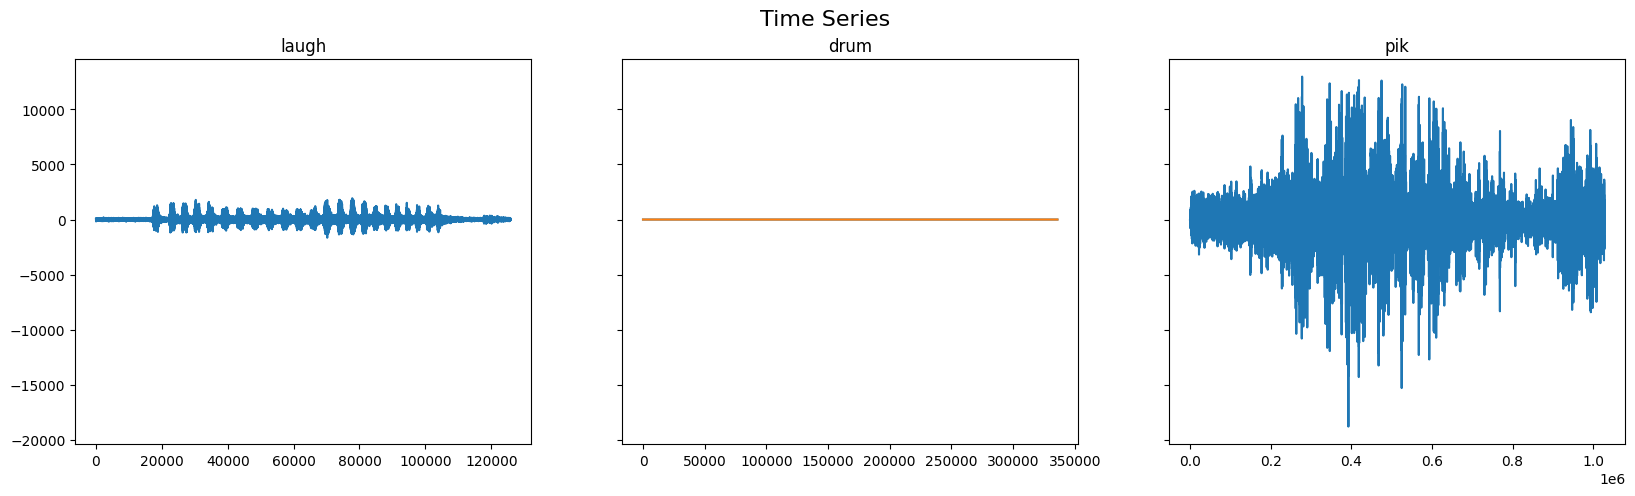

In [13]:
plot_signals(signals)

## **Fourier Transform Plots**
- ### Representing sample audios as their constituent frequencies.
- ### Seen here below, can see a little bit of the difference in the characteristic frequencies, where some have higher frequencies with greater magnitude.
- ### The x-axis represents frequency, and the y-axis represents power/magnitude. 

ValueError: x and y must have same first dimension, but have shapes (168001,) and (336000, 2)

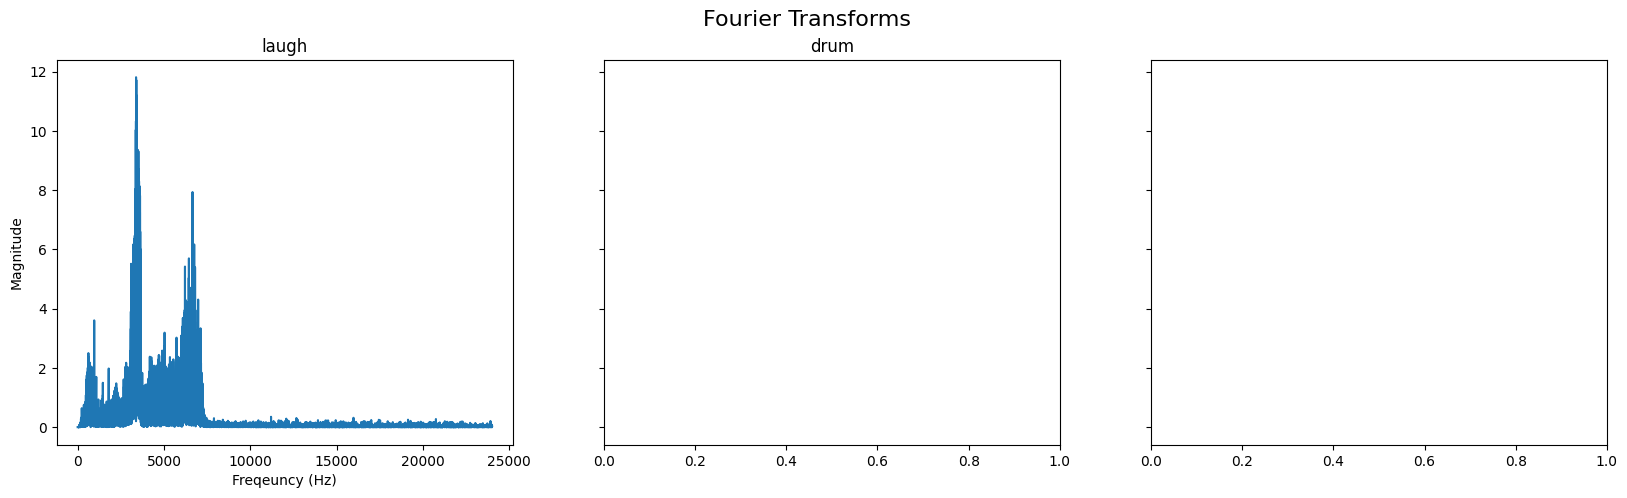

In [14]:
plot_fft(fft)

## **Filter Bank Coefficients**
- ### Filter bank coefficients are used to represent the power spectrum of a signal within specific frequency bands.
- ### Takes into account the temporal aspect of the samples. 

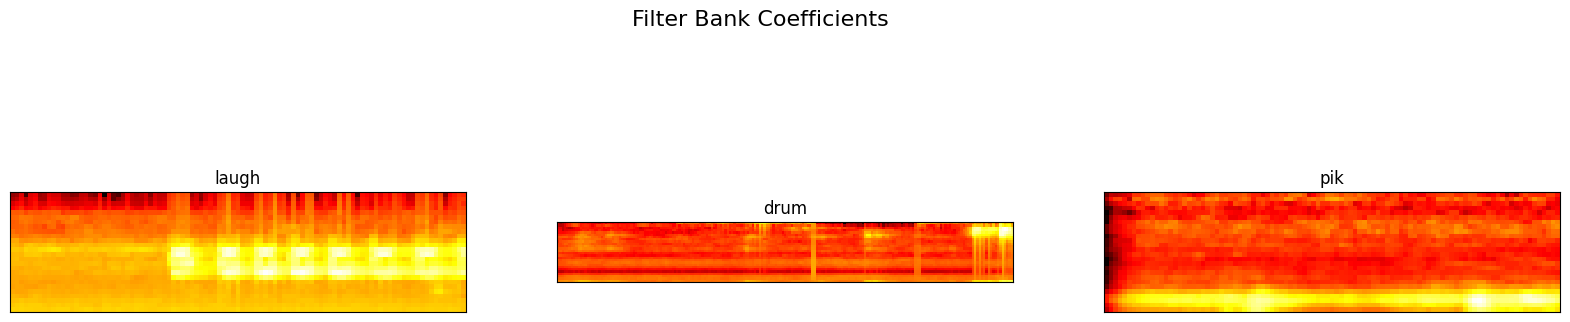

In [15]:
plot_fbank(fbank)

## **Mel Frequency Cepstral Coefficients (MFCCs)**
- ### Compacting the samples down to contain lower frequencies. 
- ### Mirroring how we humans hear, since we can more easily distinguish low frequencies compared to high frequencies.
- ### Provides a more consistent image over time that will be useful when it comes time to model. 
- ### Widely used in speech-recognition algorithms. 
- ### Uses the discrete cosine trasnform to decorrelate filter bank energies.
- ### Aim is to reduce extra information that is not specific to the sound sample in order to provide a more accurate characterization of the sample.  

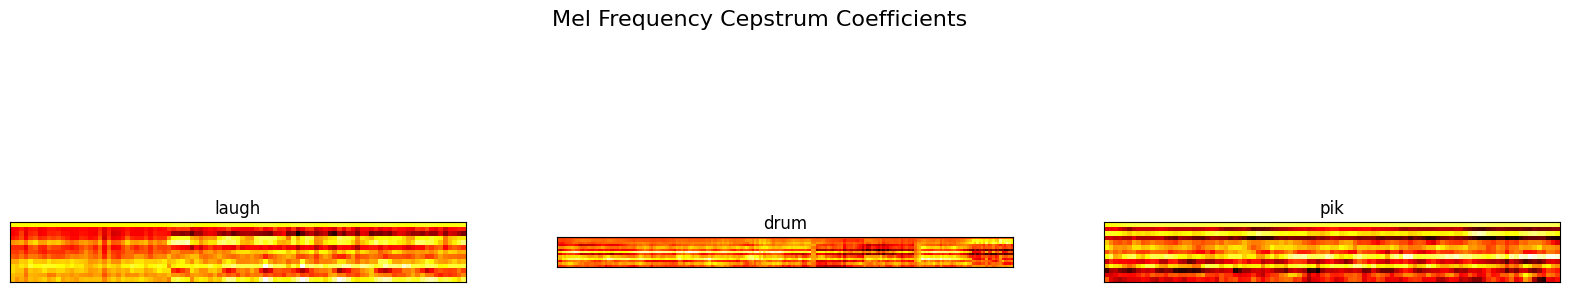

In [16]:
plot_mfccs(mfccs)

# **Processing/Cleaning Steps:**
#### 0. Make a 'requirements.txt' file that contains all of the libraries used so that this experiment could (in theory) be replicated. 
#### 1. Pre-process
- not all of the samples are the same length, so first they should be normalized to be the same length
- additionally, the samples do not all begin at the beginning
- filtering to begin the sample at the first increase in energy and continuing for 1-2 seconds could be a way to fix this
- use the ideas above to extract relevant features from each sample
- process and move processed samples to 'clean' directory
#### 2. Build Model
- set up a CNN that takes in cleaned data and after going through a series of convolutional layers, produces an prediction output, where each category has an associated probability
#### 3. Use model on un-seen data to hopefully extract even more categorizations from the Macauly Library from samples that were not used!


# Visualizing all laugh calls

/Users/calzada/birdsongs/wood/01_data/laugh_wavs


AttributeError: 'numpy.ndarray' object has no attribute 'keys'

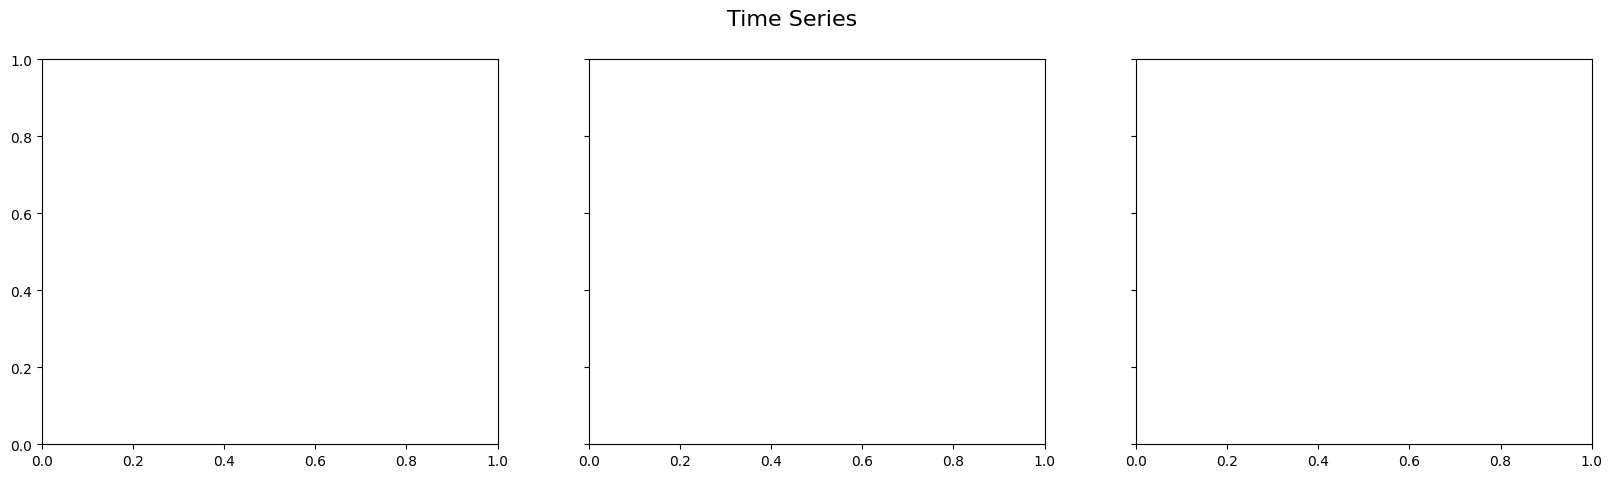

In [49]:
laugh_sigs = {}

new = os.path.join(curr_dir, 'laugh_wavs')
#print('extracting from...', new)
print(new)
waves = [os.path.join(new, x) for x in os.listdir(new)]
#waves = waves[:3] # can change the number of waves per directory we want to visualize here 
#chosen_waves = np.random.choice(waves, 1, replace=False) # let's choose three random waves from each directory to visualize
for wav in waves:
    rate, signal = wavfile.read(wav)
    laugh_sigs[wav] = signal
    plot_signals(laugh_sigs[wav])
    

In [35]:
dirs[0]

'laugh_wavs'

In [1]:
# Directory containing your .wav files
directory = os.path.join(curr_dir, 'laugh_wavs')

wav_dirs = [os.path.join(directory, x) for x in os.listdir(directory)]
first10 = wav_dirs[:10]
print(first10)

for filename in first10:
    y, sr = librosa.load(filename)
    sound_series = pd.Series(y)
    sound_series.plot(figsize=(10,5))
    
    # if filename.endswith(".wav"):
    #     file_path = os.path.join(directory, filename)
    #     y, sr = librosa.load(file_path, sr=None)
    #     time = librosa.times_like(y, sr=sr)

    #     plt.figure(figsize=(10, 4))
    #     plt.subplot(2, 1, 1)
    #     librosa.display.waveshow(y, sr=sr)
    #     plt.title(f'Waveform of {filename}')
    #     plt.xlabel('Time (s)')
    #     plt.ylabel('Amplitude')


    #     plt.subplot(2, 1, 2)
    #     D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    #     librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    #     plt.colorbar(format='%+2.0f dB')
    #     plt.title(f'Spectrogram of {filename}')
    #     plt.xlabel('Time (s)')
    #     plt.ylabel('Frequency (Hz)')

    #     plt.tight_layout()
    #     plt.show()

NameError: name 'os' is not defined